#CSE5DL Assignment

### Assignment due date: Sunday 2nd of June 2024 by 11:59 pm (AEST/AEDT)

Penalties are applied to late assignments (accepted up to 5 business days after the due date only). Five percent is deducted per business day late. A mark of zero will be assigned to assignments submitted more than 5 days late.

<font color='red'> This is an individual assignment. You are not permitted to work as a part of a group when writing this assignment. </font>

### Assignment submission

Please zip all `*.ipynb`, `*.py`, `*.docx` and `*.xlsx` files into a single zip file and submit the zipped file via the link provided on LMS.

### Copying, Plagiarism
Plagiarism is the submission of somebody else’s work in a manner that gives the impression that the work is your own. For individual assignments, plagiarism includes the case where two or more students work collaboratively on the assignment.  The Department of Computer Science and Information Technology treats plagiarism very seriously.  When it is detected, penalties are strictly imposed.

### ChatGPT
A key purpose of this assessment task is to test your own ability to complete the assigned tasks.  Therefore, the use of ChatGPT, AI tools or chatbots with similar functionality is prohibited for this assessment task. Students who are found to be in breach of this rule will be subject to normal academic misconduct measures.  Additionally, students may be engaged to provide an oral validation of their understanding of their submitted work (e.g. coding).




# Introduction

**DESCRIPTION:** In this assignment we have provided you with skeleton code. You have an image dataset, and you must train a deep learning model for it. All of the code required has already been shown to you in the labs.

In this assignment you will be required to write code and write short answer responses to questions in a structured report. You have been provided with a template Word document of this report in which you simply have to fill in the blanks (1-3 sentences is expected).

Throughout this assignment, there are a few challenge questions worth bonus marks. There are a total of 97 marks possible before challenge questions. You can receive up to 6 marks from at most 2 challenge questions, so the maximum number of marks you can get is 103. However if you get over 100 marks the actual mark you will receive is 100% for the assignment assessment component of your grades. Unless otherwise stated all marks quoted do not include challenge questions.

There are 61 marks associated with code, 21 marks associated with the short answer part of the report, and 15 marks associated with the experimentation part of the report.

**INSTRUCTIONS:**

1.   Copy the skeleton files to your Google Drive.
2.   Edit `SKELETON_DIR` in the first cell to point to the skeleton files you uploaded in step 1. The provided code assumes you have uploaded them to "Uni/CSE5DL/Assignment" in your Google Drive.
3.   Run the following two cells


In [1]:
from google.colab import drive
drive.mount('/content/drive')

# Set the working directory for the assignment
import os
SKELETON_DIR = '/content/drive/MyDrive/Uni/CSE5DL/Assignment'
os.chdir(SKELETON_DIR)
! mkdir -p "$SKELETON_DIR/saved_models"
! mkdir -p "$SKELETON_DIR/logs"

# Set up auto-reloading modules from the working directory
%load_ext autoreload
%autoreload 2

# Install extra dependencies
!pip install -q wandb==0.15.0
!pip install -q torchmetrics==0.11.3

# Set the default figure size
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 120

Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.0/289.0 kB 15.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 518.6/518.6 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 52.0 MB/s eta 0:00:00


In [ ]:
%%shell
DATA_URL='1pgFeXWvQE-rOdYSUlHHiVSO0RVUJuuU2'

pip install --upgrade --no-cache-dir gdown
pushd /content
gdown  $DATA_URL
unzip -q data.zip
popd

/content /content/drive/MyDrive/Uni/CSE5DL/Assignment
Downloading...
From (original): https://drive.google.com/uc?id=1pgFeXWvQE-rOdYSUlHHiVSO0RVUJuuU2
From (redirected): https://drive.google.com/uc?id=1pgFeXWvQE-rOdYSUlHHiVSO0RVUJuuU2&confirm=t&uuid=5bfe13fd-8322-4534-9edb-92dbda8999a5
To: /content/data.zip
100% 1.04G/1.04G [00:05<00:00, 200MB/s]
replace data/img/ISIC_0024306.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
/content/drive/MyDrive/Uni/CSE5DL/Assignment


# Task 1 - Image Classification

**MARKS**: 97

In this first task, you will create a deep learning model to classify images of skin lesions into one of seven classes:

1.   "MEL" = Melanoma
2.   "NV" = Melanocytic nevus
3.   "BCC" = Basal cell carcinoma
4.   "AKIEC" = Actinic keratosis
5.   "BKL" = Benign keratosis
6.   "DF" = Dermatofibroma
7.   "VASC" = Vascular lesion

The data for this task is a subset of: https://challenge2018.isic-archive.com/task3/

The data for this task is inside the `/content/data/img` folder. It contains ~3,800 images named like `ISIC_000000.jpg` and the following label files:

*   `/content/data/img/train.csv`
*   `/content/data/img/val.csv`
*   `/content/data/img/train_small.csv`
*   `/content/data/img/val_small.csv`

The `small` versions are the first 200 lines of each partition and are included for debugging purposes. To save time, ensure your code runs on the `small` versions first.

**NOTE**: To explore the labels, you can click the above hyperlinks to open the relevant csv file.

## Task 1a. Explore the training set

**MARKS**: 8 (Code 6, Reports 2)

**INSTRUCTIONS**: Check for data issues, as we have done in the labs. Check the class distribution and at least 1 other potential data issue. Hint: Look in `explore.py` for a function that can plot the class distribution.

**REPORT**: What did you check for? What data issues are present in this dataset?

**HINT**: This task primarily requires "PyTorch Basics" lab.

In [ ]:
import pandas as pd

# IMAGE CLASS NAMES:
# Melanoma; Melanocytic nevus; Basal cell carcinoma; Actinic keratosis;
# Benign keratosis; Dermatofibroma; Vascular lesion
IMG_CLASS_NAMES = ["MEL", "NV", "BCC", "AKIEC", "BKL", "DF", "VASC"]

# Defining the training and validation data frames (full size and small size)
train_df = pd.read_csv('/content/data/img/train.csv')
val_df = pd.read_csv('/content/data/img/val.csv')
train_df_sml = pd.read_csv('/content/data/img/train_small.csv')
val_df_sml = pd.read_csv('/content/data/img/val_small.csv')


In [ ]:
from PIL import Image
# Change the filename to view other examples from the dataset
display(Image.open('/content/data/img/ISIC_0024310.jpg'))

## CHECKING THAT IMAGES ARE LABELLED CORRECTLY VIA A SAMPLE ------------------
# Using https://challenge.isic-archive.com/landing/2018/47/, one can see
# the correct identification of the images.

# The following images were randomly selected as examples after scrolling through
# the dataframe for images with different labels

# Melanoma
#display(Image.open('/content/data/img/ISIC_0024310.jpg'))
# Melanocytic nevus
display(Image.open('/content/data/img/ISIC_0024306.jpg'))
# Basal cell carcinoma
display(Image.open('/content/data/img/ISIC_0024403.jpg'))
# Actinic keratosis
display(Image.open('/content/data/img/ISIC_0024418.jpg'))
# Benign keratosis
display(Image.open('/content/data/img/ISIC_0024408.jpg'))
# Dermatofibroma
display(Image.open('/content/data/img/ISIC_0024845.jpg'))
# Vascular lesion
display(Image.open('/content/data/img/ISIC_0024475.jpg'))

# Although this does not check if every image was labelled correctly,
# and although this is somewhat difficult to assess with an untrained eye,
# it does provide some reassurance to continue

Output hidden; open in https://colab.research.google.com to view.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3004 entries, 0 to 3003
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   image   3004 non-null   object 
 1   MEL     3004 non-null   float64
 2   NV      3004 non-null   float64
 3   BCC     3004 non-null   float64
 4   AKIEC   3004 non-null   float64
 5   BKL     3004 non-null   float64
 6   DF      3004 non-null   float64
 7   VASC    3004 non-null   float64
dtypes: float64(7), object(1)
memory usage: 187.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   image   400 non-null    object 
 1   MEL     400 non-null    float64
 2   NV      400 non-null    float64
 3   BCC     400 non-null    float64
 4   AKIEC   400 non-null    float64
 5   BKL     400 non-null    float64
 6   DF      400 non-null    float64
 7   VASC    400 non-null    floa

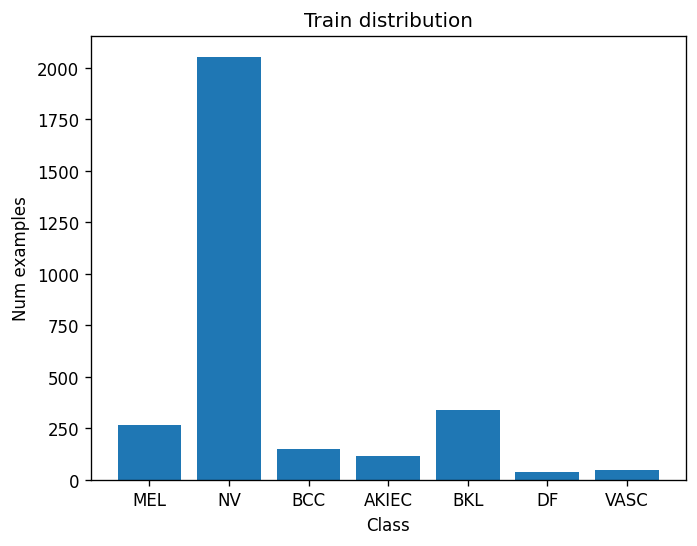

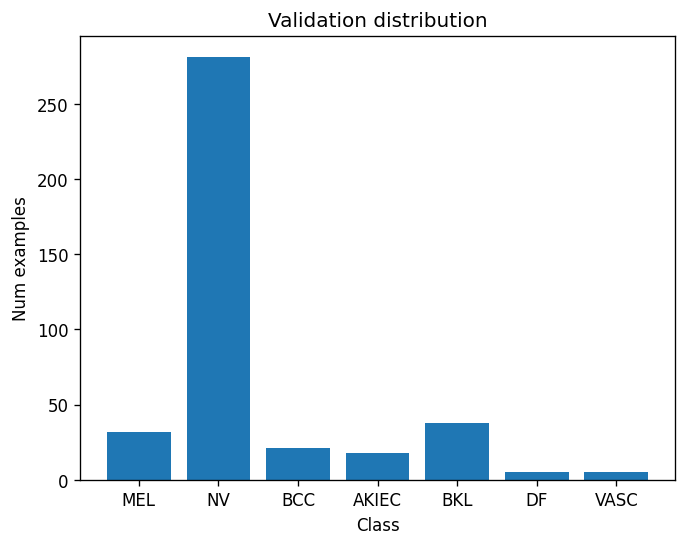

Distributions as percentages - Train Data
MEL: 8.89%
MEL: 267
NV: 68.31%
NV: 2052
BCC: 5.03%
BCC: 151
AKIEC: 3.79%
AKIEC: 114
BKL: 11.28%
BKL: 339
DF: 1.20%
DF: 36
VASC: 1.50%
VASC: 45
Distributions as percentages - Validation Data
MEL: 8.00%
MEL: 32
NV: 70.25%
NV: 281
BCC: 5.25%
BCC: 21
AKIEC: 4.50%
AKIEC: 18
BKL: 9.50%
BKL: 38
DF: 1.25%
DF: 5
VASC: 1.25%
VASC: 5


In [ ]:
# Importing the 'plot label distribution' function from explore.py
import explore

### CHECKING FOR DATA ISSUES -------------------------------------------------
## CHECKING FOR MISSING DATA --------------------------------------------------

# Checking for null values and distribution of train/val split
#train_df.isnull().sum()
train_df.info() # 3004 non-null values
#val_df.isnull().sum()
val_df.info() # 400 non-null values

#train_df_sml.isnull().sum()
#train_df_sml.info() # 199 non-null values
#val_df_sml.isnull().sum()
#val_df_sml.info() #200 non-null values

## CHECKING THE DISTRIBUTION OF CLASSES ---------------------------------------

# Adding a new column on the train and val datasets for labels
train_df['Label'] = train_df[IMG_CLASS_NAMES].values.argmax(axis=1)
val_df['Label'] = val_df[IMG_CLASS_NAMES].values.argmax(axis=1)
train_df_sml['Label'] = train_df_sml[IMG_CLASS_NAMES].values.argmax(axis=1)
val_df_sml['Label'] = val_df_sml[IMG_CLASS_NAMES].values.argmax(axis=1)

#Assigning new labels to all datasets for consistency and to reduce future confusion
val_df_new = val_df
train_df_sml_new = train_df_sml
val_df_sml_new = val_df_sml

# Verifying that the correct labels correspond with the correct class
#print(train_df.head())
#print(val_df.head())
#print(train_df_sml.head())
#print(val_df_sml.head())

# Extracting labels into arrays for each set
train_arr_labels = train_df['Label']
val_arr_labels = val_df['Label']
train_arr_sml_labels = train_df_sml['Label']
val_arr_sml_labels = val_df_sml['Label']

# Verifying the arrays
#print(train_arr_labels)
#print(val_arr_labels)

# Plotting the distribution of labels
explore.plot_label_distribution(train_arr_labels, 'Train', IMG_CLASS_NAMES)
explore.plot_label_distribution(val_arr_labels, 'Validation', IMG_CLASS_NAMES)

# Checking proportionality as percentages
explore.percentages_distributions(train_arr_labels, 'Train', IMG_CLASS_NAMES)
explore.percentages_distributions(val_arr_labels, 'Validation', IMG_CLASS_NAMES)

# There is a class imbalance with NV (Melanocytic Nevus) heavily outweighing
# the rest of the data.



## Task 1b. Implement Training loop

**MARKS**: 22 (Code 20, Reports 2)

**INSTRUCTIONS**:

*   Implement LesionDataset in `datasets.py`. Use the cell below to test your implementation.
*   Implement the incomplete functions in `train.py` marked as "Task 1b"
*   Go to the [Model Training Cell](#task-1-model-training) at the end of Task 1 and fill in the required code for "Task 1b".

**REPORT**: Why should you *not use* `random_split` in your code here?

**HINT**: This task primarily requires "PyTorch Basics" lab.

In [ ]:
import datasets
from sklearn.model_selection import train_test_split

## SPLITTING THE TRAINING DATA INTO TEST AND TRAINING DATA
## USING STRATIFIED SAMPLING --------------------------------------------------

# Finding percentage of validation set from overall set
# print((100/3004)*400)

train_df_new, test_df_new = train_test_split(train_df, test_size=0.1332,
                                             stratify=train_df['Label'],
                                             random_state=42)

train_df_new.to_csv('/content/data/img/train_labelled.csv', index=False)
val_df_new.to_csv('/content/data/img/val_labelled.csv', index=False)
test_df_new.to_csv('/content/data/img/test_labelled.csv', index=False)

train_df_sml_new.to_csv('/content/data/img/train_sml_labelled.csv', index=False)
val_df_sml_new.to_csv('/content/data/img/val_sml_labelled.csv', index=False)


print("Train DataFrame:     ", train_df_new.shape) # Train data now has 2603 entries
print("Validation DataFrame:", val_df_new.shape) # Val data still has 400 entries
print("Test DataFrame:      ", test_df_new.shape) # Test data now has 401 entries

#print("Train Sml DataFrame:     ", train_df_sml_new.shape) # Train data now has 199 entries
#print("Validation Sml DataFrame:", val_df_sml_new.shape) # Val data still has 200 entries


## RECHECKED CLASS REPRESENTATION IN THE PARTITIONS: STRATIFIED SAMPLING WORKED
## ----------------------------------------------------------------------------
#train_new_labels = train_df_new['Label']
#val_new_labels = val_df_new['Label']
#test_new_labels = test_df_new['Label']
#explore.percentages_distributions(train_new_labels, 'Train', IMG_CLASS_NAMES)
#explore.percentages_distributions(val_new_labels, 'Validation', IMG_CLASS_NAMES)
#explore.percentages_distributions(test_new_labels, 'Test', IMG_CLASS_NAMES)
#explore.plot_label_distribution(test_new_labels, 'Test', IMG_CLASS_NAMES)

## IMPLEMENTING THE LESION DATASET --------------------------------------------

train_dataset = datasets.LesionDataset('/content/data/img', '/content/data/img/train_labelled.csv', augment = True)
val_dataset = datasets.LesionDataset('/content/data/img', '/content/data/img/val_labelled.csv')
test_dataset = datasets.LesionDataset('/content/data/img', '/content/data/img/test_labelled.csv')

train_sml_dataset = datasets.LesionDataset('/content/data/img', '/content/data/img/train_sml_labelled.csv', augment = True)
val_sml_dataset  = datasets.LesionDataset('/content/data/img', '/content/data/img/val_sml_labelled.csv')

## CHECKING OUTPUT: TENSOR OF IMAGE PIXELS OUTPUTTED --------------------------
input, label = train_dataset[0]
print(input)
print(label)
print(train_df_new.head())
print(input.shape)

## CHECKING ALL IMAGES HAVE THE SAME DIMENSIONS -------------------------------

#def check_sizes(dataset,index):
#  input, label = dataset[0]
#  first_dimensions = input.shape
#  print(f'The size of the first image in the dataset is {first_dimensions}')
#  same_dimensions_count = 0
#  for i in range(len(dataset)):
#    next_input, label = dataset[i]
#    dimensions = next_input.shape
#    if next_input.size() == first_dimensions:
#        same_dimensions_count += 1

#  print(f'The total number of images in the dataset with these dimensions is {same_dimensions_count}')

#check_sizes(train_dataset,0)
#check_sizes(val_dataset,0)
#check_sizes(test_dataset,0)
# check_sizes(train_sml_dataset,0)
# check_sizes(val_sml_dataset,0)


## TASK 1D: FIXING THE CLASS IMBALANCE ----------------------------------------

# recalculating counts and proportions after the split into test and training partitions
train_counts = {}
val_counts = {}

train_proportions = {}
val_proportions = {}

train_weights = {}
val_weights = {}

for num in range(7):
  train_counts[num] = sum(label == num for label in train_dataset.labels)
  train_proportions[num] = train_counts[num] / len(train_dataset.labels)
  train_weights[num] = 1 - train_proportions[num]

  val_counts[num] = sum(label == num for label in val_dataset.labels)
  val_proportions[num] = val_counts[num] / len(val_dataset.labels)
  val_weights[num] = 1 - val_proportions[num]

#print(train_proportions)
#print(val_proportions)
#print(" ")
#print(val_weights)
#print(train_weights)

weights = [train_weights[label] for label in train_dataset.labels]

#print(train_weights)
#print(weights)
#print(len(weights))




Train DataFrame:      (2603, 9)
Validation DataFrame: (400, 9)
Test DataFrame:       (401, 9)
tensor([[[0.6906, 0.6734, 0.6392,  ..., 0.7933, 0.8104, 0.8104],
         [0.6906, 0.6734, 0.6563,  ..., 0.7933, 0.8104, 0.8104],
         [0.6906, 0.6563, 0.6563,  ..., 0.7933, 0.8104, 0.7933],
         ...,
         [0.4851, 0.4679, 0.4851,  ..., 0.6392, 0.6221, 0.6221],
         [0.4679, 0.4851, 0.4679,  ..., 0.6392, 0.6221, 0.6221],
         [0.4337, 0.4851, 0.4679,  ..., 0.6392, 0.6221, 0.6221]],

        [[0.2577, 0.2577, 0.2402,  ..., 0.4328, 0.4678, 0.4853],
         [0.2752, 0.2752, 0.2227,  ..., 0.4328, 0.4503, 0.4853],
         [0.3102, 0.2227, 0.2052,  ..., 0.4678, 0.4678, 0.4853],
         ...,
         [0.0826, 0.0826, 0.0651,  ..., 0.2052, 0.1702, 0.1352],
         [0.0651, 0.0651, 0.0476,  ..., 0.1877, 0.1527, 0.1176],
         [0.0476, 0.0476, 0.0301,  ..., 0.1702, 0.1352, 0.1352]],

        [[1.0017, 1.0191, 0.9668,  ..., 1.0539, 1.1237, 1.0888],
         [1.0017, 1.0191, 0.9

## Task 1c. Implement a baseline convolutional neural network

**MARKS**: 25 (Code 18, Reports 7)

You will implement a baseline convolutional neural network which you can compare results to. This allows you to evaluate any improvements made by hyperparameter tuning or transfer learning.

**INSTRUCTIONS**:

*   Implement a `SimpleBNConv` in `models.py` with:
    *   5 `nn.Conv2d` layers, with 8, 16, 32, 64, 128 output channels respectively, with the following between each convolution layer:
        *   `nn.ReLU()` for the activation function, and
        *   `nn.BatchNorm2d`, and
        *   finally a `nn.MaxPool2d` to downsample by a factor of 2.
*   Use a normalised confusion matrix on the model's validation predictions in `train.py`.
*  Go to the [Model Training Cell](#task-1-model-training) at the end of Task 1 and fill in the required code to train the model.

Training should take about 1 minute/epoch. Validation accuracy should be 60-70%, but UAR should be around 20-40%.

**REPORT**: As training sets get larger, the length of time per epoch also gets larger. Some datasets take over an hour per epoch. This makes it impractical to debug typos in your code since it can take hours after starting for the program to reach new code. Name two ways to significantly reduce how long **each** epoch takes - for debugging purposes - while still using real data and using the real training code.

**REPORT**: Show the confusion matrix and plots of the validation accuracy and UAR in your report, and explain what is going wrong.
(Right-click a plot and select "save image as..." to save the image to your computer)

**HINT**: This task primarily requires "Convolutional Neural Networks" lab.

## Task 1d. Account for data issues

**MARKS**: 12 (Code 8, Reports 4)

**INSTRUCTIONS**: Account for the data issues in Task 1a and retrain your model.

**REPORT**: How did you account for the data issues? Was it effective? How can you tell? Show another confusion matrix.

**IMPORTANT NOTE**: One of the techniques from the lab will cause a warning in the metric calculation on `train_small.csv`, but will work fine on `train.csv`.

**HINT**: This task primarily requires "Debugging Neural Networks" lab.

## Task 1e. Data Augmentation

**MARKS**: 10 (Code 4, Reports 6)

**INSTRUCTIONS**:

*   Add an `augment` flag to LesionDataset which specifies whether any augmentation is done to the images. Ensure it is set to `True` *only* for the training dataset.
*   Use random horizontal flips
*   Use at least 2 other different non-deterministic augmentations

**REPORT:** Are random vertical flips appropriate for this dataset? Why?

Using data augmentation does not guarantee improved model performance. Data augmentation can hurt test performance by making the model train on unrealistic images.

**REPORT**: What effect did Data Augmentation have on performance? Show a screenshot of the relevant graphs from Weights & Biases for evidence.

**CHALLENGE**: (3 marks) Apply 5 crop augmentation with crop size 200x300. Make a distinct model which uses 5 crops at once to give a single answer. Include in your report how you did this and report the effect on performance.

**HINT**: This task primarily requires "Image Augmentation" lab.

## Task 1f. Chase improved performance

**MARKS**: 20 (Code and reports)

**INSTRUCTIONS**:
*   Create a model from a pre-trained model from the torchvision model zoo. We recommend Resnet18, but you may use any model you like. You may freeze the weights of all layers except the last, or fine-tune all the weights. https://drive.google.com/file/d/12Bq-00qRNTBxzGZ9X_iqWndluB5hmuG1/view?usp=share_link
*   Create your own models, modifying the model architecture, try different losses, learning rates. Change anything you like except the evaluation metrics in search of a better model.

Train at least 10 different models, each with a different combination.

**REPORT**: Create a table in an excel spreadsheet that is similar to that used in Lab 3 to record your results. Make sure it includes every parameter of variation between your combinations as a separate column. Include notes about what you were thinking/hoping for each combination as a number column in the spreadsheet.

In addition to the excel spreadsheet generate a report using Weights and Biases of the models you trained and the performance curves. Save the report as a pdf and include this in your submission. Please see this link on how to generate reports with Weights and Biases. https://docs.wandb.ai/guides/reports

Play around with Weights and Biases to see what cool features you can dig out and use to better visualize the training results and use that to improve the information shared via the report.

**Important**: Write a discussion about the key findings from the experimental results. What worked? What didn't? You don't need to be correct, you just need to put forward a coherent and consistent argument based on your observed results.

**CHALLENGE REPORT**: (3 marks) Assuming you use the full dataset in a single epoch, if you halve the size of the batch size, what happens to the number of times that you update the weights per epoch? With reference to the gradients, under what circumstances is this good?

**HINT**: The first part of this task primarily requires "Transfer Learning" lab.

<a name="task-1-model-training"></a>
## Model Training Cell

We will be using Weights and Biases to keep track of our experimental runs and evaluation metrics. The Weights and Biases tool is only used in "Text Sentiment Analysis" lab. If you have not completed this lab yet, you can get started with Weights and Biases by following Steps 1a), b) and c) from the following link: https://docs.wandb.ai/quickstart


In [ ]:
!pip install wandb -qU
import wandb
wandb.login()

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.utils.data.sampler import WeightedRandomSampler

import datasets
import models
import train
from train import device

torch.manual_seed(42)

NUM_EPOCHS = 5
BATCH_SIZE = 64

# Create datasets/loaders
# TODO Task 1b - Create the data loaders from LesionDatasets
# train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)




#test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# TODO Task 1d - Account for data issues, if applicable
sampler = torch.utils.data.sampler.WeightedRandomSampler(weights, len(train_dataset))

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, sampler=sampler)

val_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)




# Instantiate model, optimizer and criterion
# TODO Task 1c - Make an instance of your model

#model = models.SimpleBNConv(device).to(device)

model = models.ResNet18(device).to(device)

# TODO Task 1d - Account for data issues, if applicable
# model = ...

optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss()

# Train model
# TODO Task 1c: Set ident_str to a string that identifies this particular
#               training run. Note this line in the training code
#                     exp_name = f"{model.__class__.__name__}_{ident_str}"
#               So it means the the model class name is already included in the
#               exp_name string. You can consider adding other information
#               particular to this training run, e.g. learning rate (lr) used,
#               augmentation (aug) used or not, etc.



ident_str = "TESTRUN_PerezaugsnoCJ_Adam_wgtdsmplr_lr0.0001"

train.train_model(model, train_loader, val_loader, optimizer, criterion,
                  IMG_CLASS_NAMES, NUM_EPOCHS, project_name="CSE5DL Assignment Task 1",
                  ident_str= ident_str)

AttributeError: module 'wandb.sdk' has no attribute 'data_types'